# Exploratory data analysis

Andreas Svendsen

This script provides the code for exploratory data analysis

#### Libraries

In [ ]:
library(limma)
library(edgeR)
library(ggplot2)
library(here)


here() starts at C:/Users/alosvendsen/OneDrive - Syddansk Universitet/PhD/Kurser/Biostat 2/biostat_project

#### Exploratory data analysis

In [ ]:
# Load the DGEList object
dge_data <- readRDS("outputs/data_processed/dge_data.rds")


In [ ]:
raw_summary_statistics <- summary(dge_data$counts)

raw_summary_statistics |> kbl(format = "simple")


            S1                S2                S5               S6               S7                S8                S11              S12              S13               S14               S15              S16             S17               S18              S19              S20
  -- ----------------- ----------------- ----------------- --------------- ----------------- ----------------- ----------------- --------------- ----------------- ----------------- ----------------- --------------- ---------------- ----------------- --------------- -----------------
        Min. : 0.0        Min. : 0.0        Min. : 0.0        Min. : 0        Min. : 0.0        Min. : 0.0        Min. : 0.0        Min. : 0        Min. : 0.0        Min. : 0.0        Min. : 0.0        Min. : 0        Min. : 0.0       Min. : 0.0        Min. : 0        Min. : 0.0
       1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0      1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0      1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0.0      1st Qu.: 0      1st Qu.: 0.0     1st Qu.: 0.0      1st Qu.: 0      1st Qu.: 0.0
       Median : 0.0      Median : 0.0      Median : 0.0      Median : 0      Median : 0.0      Median : 0.0      Median : 0.0      Median : 0      Median : 0.0      Median : 0.0      Median : 0.0      Median : 0      Median : 0.0     Median : 0.0      Median : 0      Median : 0.0
       Mean : 445.5      Mean : 490.9      Mean : 380.3      Mean : 809      Mean : 701.2      Mean : 454.5      Mean : 485.1      Mean : 376      Mean : 552.4      Mean : 539.8      Mean : 589.6      Mean : 606      Mean : 345.7     Mean : 470.2      Mean : 963      Mean : 364.1
       3rd Qu.: 6.0      3rd Qu.: 7.0      3rd Qu.: 5.0      3rd Qu.: 11     3rd Qu.: 8.0      3rd Qu.: 5.0      3rd Qu.: 7.0      3rd Qu.: 6      3rd Qu.: 8.0      3rd Qu.: 8.0      3rd Qu.: 8.0      3rd Qu.: 8      3rd Qu.: 5.0     3rd Qu.: 6.0      3rd Qu.: 14     3rd Qu.: 6.0
      Max. :2538985.0   Max. :2704036.0   Max. :2141005.0   Max. :4703701   Max. :1749370.0   Max. :1070663.0   Max. :2310630.0   Max. :1712257   Max. :1676606.0   Max. :1475056.0   Max. :2717621.0   Max. :2757600   Max. :934710.0   Max. :1271255.0   Max. :5309784   Max. :1956794.0


In [ ]:
# Key observations:
# 1. Zero-Inflated: A significant portion of the counts are zeros across all
# samples. This is not uncommon in RNA-seq data. Probably also very likely
# since we have just one cell type and are aligning with the entire human
# transcriptome.
# 2. Outliers: The maximum counts are substantially higher than the 75th
# percentile, indicating the presence of outliers or highly expressed genes.
# 3.Skewness: The data is heavily skewed, with mean values much higher than
# the median (50th percentile), which is zero in most cases.

# # Boxplot of gene counts per sample
# boxplot.matrix(dge_data$counts)


Raw counts/sample boxplot

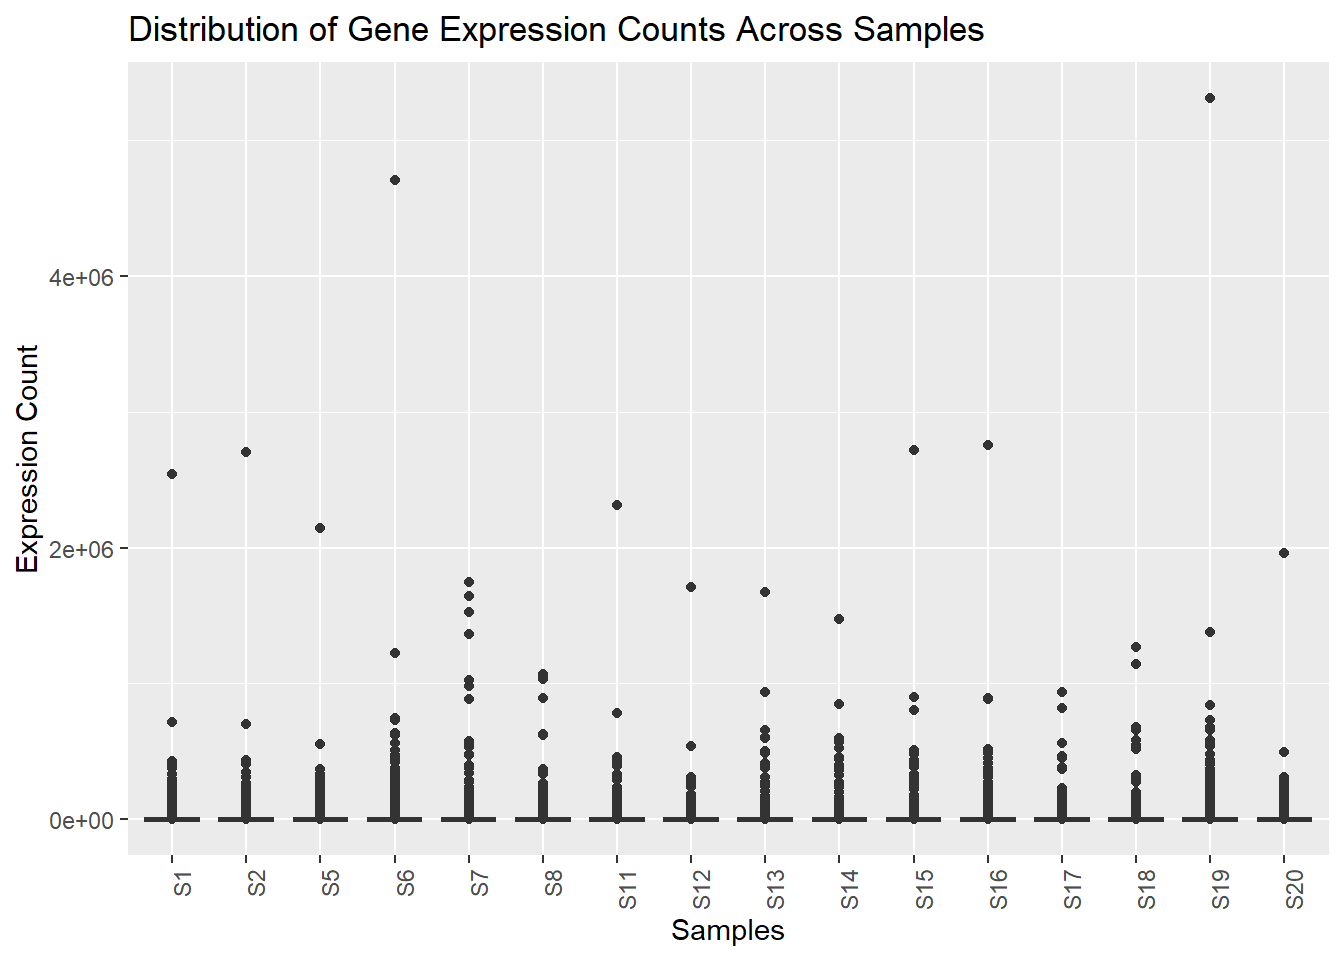

In [ ]:
# In ggplot:
# Convert the matrix to a long-form data.frame for ggplot
expression_long <- as.data.frame(as.table(dge_data$counts))
# Create the boxplot using ggplot2
boxplot_raw_counts <- ggplot(expression_long, aes(x=Var2, y=Freq)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Samples", y = "Expression Count") +
  ggtitle("Distribution of Gene Expression Counts Across Samples")
 

boxplot_raw_counts
